<a href="https://colab.research.google.com/github/maro000/for_data_analysis_and_visualization/blob/master/Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
dataset = randn(25)

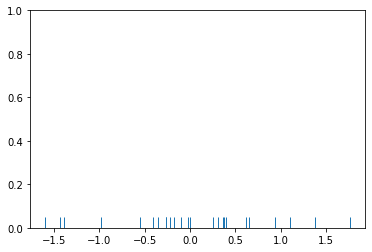

In [5]:
sns.rugplot(dataset)

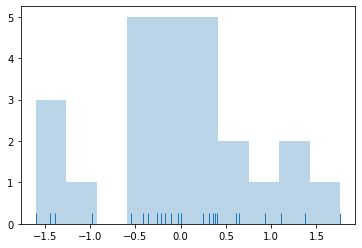

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

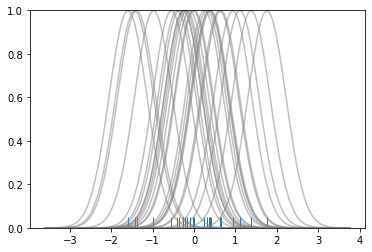

In [10]:
sns.rugplot(dataset)

x_min =dataset.min() - 2
x_max =dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
  kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  kernel= kernel /kernel.max()
  kernrl= kernel *0.4
  plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

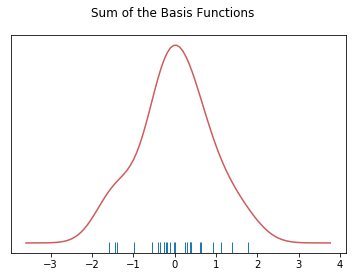

In [11]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig =plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')


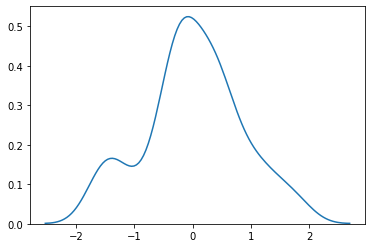

In [12]:
sns.kdeplot(dataset)

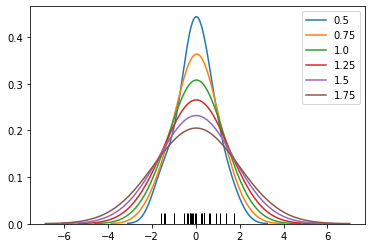

In [16]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

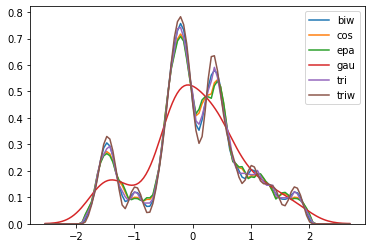

In [17]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

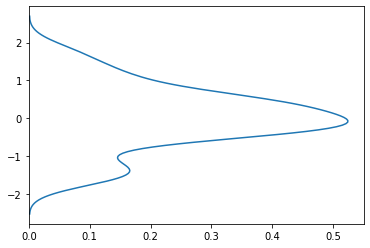

In [18]:
sns.kdeplot(dataset ,vertical=True)

(array([ 3.,  4.,  4.,  9., 14., 19., 21., 22., 24., 25.]),
 array([-1.5976277 , -1.26171391, -0.92580013, -0.58988634, -0.25397256,
         0.08194123,  0.41785501,  0.7537688 ,  1.08968259,  1.42559637,
         1.76151016]),
 <a list of 10 Patch objects>)

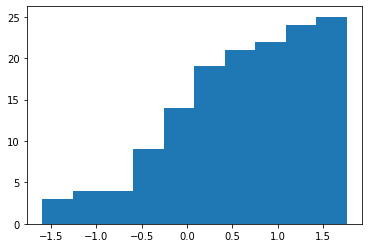

In [20]:
plt.hist(dataset,cumulative=True)

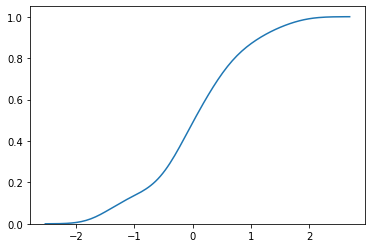

In [21]:
sns.kdeplot(dataset,cumulative=True)

In [0]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


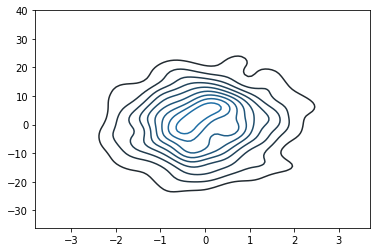

In [24]:
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


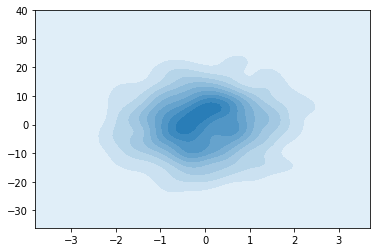

In [25]:
sns.kdeplot(dframe,shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


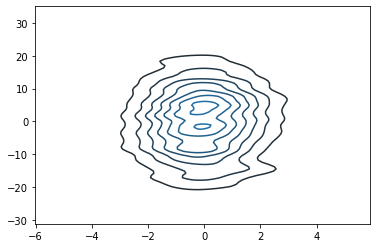

In [26]:
sns.kdeplot(dframe,bw=1
            )

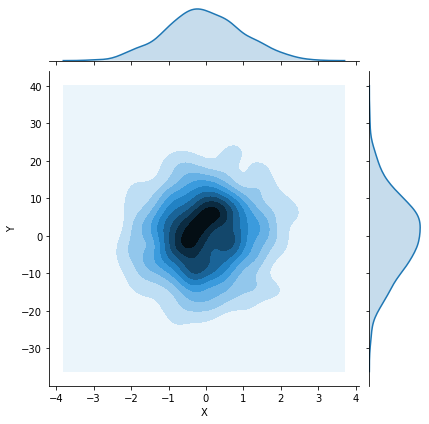

In [27]:
sns.jointplot('X','Y',dframe,kind='kde')